# Initial trading algo

Using tutorial from: https://backtest-rookies.com/2017/06/02/getting-started-first-script/

In [1]:
# Load libraries
import backtrader as bt
from datetime import datetime

In [2]:
# Create a strategy
class firstStrategy(bt.Strategy):

    def __init__(self):
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)

In [3]:
#V ariable for our starting cash
startcash = 10000

In [4]:
# Create an instance of cerebro
cerebro = bt.Cerebro()

# Add our strategy
cerebro.addstrategy(firstStrategy)

# Get Apple data from Yahoo Finance.
data = bt.feeds.Quandl(
    dataname='AAPL',
    fromdate = datetime(2016,1,1),
    todate = datetime(2017,1,1),
    buffered= True
    )

# Add the data to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(startcash)

# Run over everything
cerebro.run()

# Get final portfolio Value
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash

Final Portfolio Value: $11755.2851701423
P/L: $1755.2851701423006


<IPython.core.display.Javascript object>


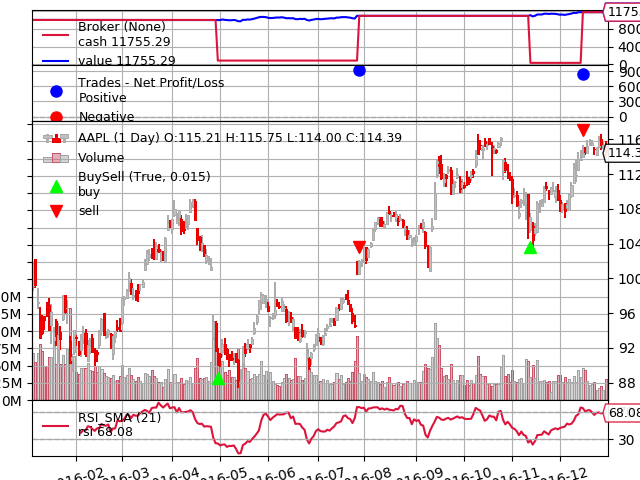

[[<Figure size 640x480 with 5 Axes>]]

In [5]:
# Print out the final result
print('Final Portfolio Value: ${}'.format(portvalue))
print('P/L: ${}'.format(pnl))

# Finally plot the end results
cerebro.plot(style='candlestick')